### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<b>Exploratory Data Analysis</b>
   - First, we need to analyze/understand the data set before making any decisions.
   - Use .info() method and it returns column names and their data types as well as non-null values and memory usage
   - Verify any duplicate rows in the data set
   - Verify any missing values in the data set.
   - Look into the specifics of each column using .value_counts()
   - Find correlation in numeric features.
   

In [4]:
# print summary of data frame to get column names and their data types as well as non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<b>Descriptive Analysis:</b>
   - The data set contains 18 categorical and 8 numerical features.

In [5]:
# Next, we will check duplicates in the data set.
# Print number of duplicate rows exist in the data set.
duplicate_rows_count = data.duplicated().sum()

print('\nDuplicate entries count:', duplicate_rows_count)


Duplicate entries count: 74


In [6]:
# Next, we will check missing values in the data set
# Print number of missing values in each column

missing_values_count = data.isnull().sum()

print('\nMissing values in each column with count:\n')
print(missing_values_count)


Missing values in each column with count:

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


<b>Observations:</b>
   - The 'car' feature is missing most (99%) of the values so it will be unfit for imputation process so we can drop this        feature from the data set.
   - other features have approximately 1% of missing values so we can fill values for them.

In [7]:
# Next, find the frequency of categories and imbalance or biased data in the dataset.
# print value counts for each non-numeric column in the data frame

for column in data.select_dtypes(exclude=['int64']).columns:    
    print("\n"+ column +":\n", data[column].value_counts())


destination:
 No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

passanger:
 Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

weather:
 Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

time:
 6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

coupon:
 Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

expiration:
 1d    7091
2h    5593
Name: expiration, dtype: int64

gender:
 Female    6511
Male      6173
Name: gender, dtype: int64

age:
 21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

maritalStatus:
 Married partner      5100
Single               4752
Unmarried partner    2186
Divorced 

<b>Observations:</b>
   - 'occupation' has too many unique values.

In [8]:
# Next, we can find correlation in numerical features
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


<b>Observations:</b>
   - In the above correlation matrix 'directon_same' and 'direction_opp' are perfectly correlated so we can remove one of the features. 
   - 'tocoupon_geq5min' does not correlate with any other feature so we can drop them or assign constant value

3. Decide what to do about your missing data -- drop, replace, other...

<b>Data Cleansing</b>
   - We are going to apply below data cleansing techniques on the data set.
   - Convert all the column names to lower case.
   - Drop duplicates in the data set.
   - Create a copy of the data set before filling in the missing values.
   - Drop columns that do not have any effect on the prediction.
   - Fill in the columns that have missing values.
   - Convert columns to int data types.

In [9]:
# We are going to replace the missing data in this section before that we do the following steps.

# Renaming columns to lower case. It will save lot of time during data analysis
data.columns= data.columns.str.lower()

In [10]:
# Removing duplicate entries in the original data frame. 
# It contains duplicate rows across all columns (total count=74) except one or two columns have (count=73). 
# So, I have decided to remove all duplicated rows.
data.drop_duplicates(inplace=True)

In [11]:
# Using copy of original data frame to deal with missing values
df = data.copy()

In [12]:
# Dropping columns that have the most missing values and also columns that are analyzed from correlation matrix.
# Based on the above printed data it's 'car', 'direction_opp' and 'tocoupon_geq5min' features.
df = df.drop(columns=['car', 'direction_opp', 'tocoupon_geq5min'])

In [13]:
# Missing data columns
columns_with_missing_values = ['bar', 'coffeehouse', 'carryaway', 'restaurantlessthan20', 'restaurant20to50']

# The above columns are categorical so we can use 'mode' which is frequently occuring data to fill these columns.
columns_with_missing_values_mode = df.filter(columns_with_missing_values).mode()

# Filling the missing values 
df[columns_with_missing_values] = df.filter(columns_with_missing_values).fillna(columns_with_missing_values_mode.iloc[0])

In [14]:
# Some attributes in context of coupons (time.. etc) need some renaming in values for proper interpretation.
cols_need_to_rename_values = ['time']

time_dict = {
    '7AM':'Morning',
    '10AM':'Morning',
    '2PM':'Evening',
    '6PM':'Evening',
    '10PM':'Night'
}

mapping_dicts = [time_dict]

for column, values_dict in zip(cols_need_to_rename_values, mapping_dicts):
    df[column] = df[column].map(values_dict)

In [15]:
# Print first few rows to see the missing data is filled
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,income,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq15min,tocoupon_geq25min,direction_same,y
0,No Urgent Place,Alone,Sunny,55,Evening,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Morning,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,Evening,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,Evening,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


4. What proportion of the total observations chose to accept the coupon? 



In [16]:
# 'y' is the column for coupon acceptance. y=1 (Coupon Accepted) and y=0 (Coupon Rejected)
# Calculating the proportion of observations that accepted the coupon
y_distribution = df.y.value_counts(normalize=True)

print(f"The proportion of observations that accepted the coupon is {y_distribution.iloc[0] * 100:.2f}%")
print(f"The proportion of observations that rejected the coupon is {y_distribution.iloc[1] * 100:.2f}%")

The proportion of observations that accepted the coupon is 56.76%
The proportion of observations that rejected the coupon is 43.24%


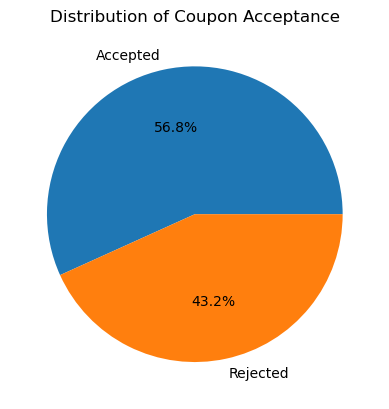

In [17]:
# Plotting with Pie chart to visually represent above data.
# Plotting pie chart for 'y' column using Matplotlib
plt.pie(y_distribution, labels=['Accepted','Rejected'], autopct='%1.1f%%')
# Adding title to the plot
plt.title('Distribution of Coupon Acceptance')
plt.savefig('images/proportion_of_coupon_acceptance.png')

# Display the plot
plt.show()

<b>Observations:</b>
   - This dataset is partially balanced with coupon acceptance of 57% and coupon rejection of 43%

5. Use a bar plot to visualize the `coupon` column.

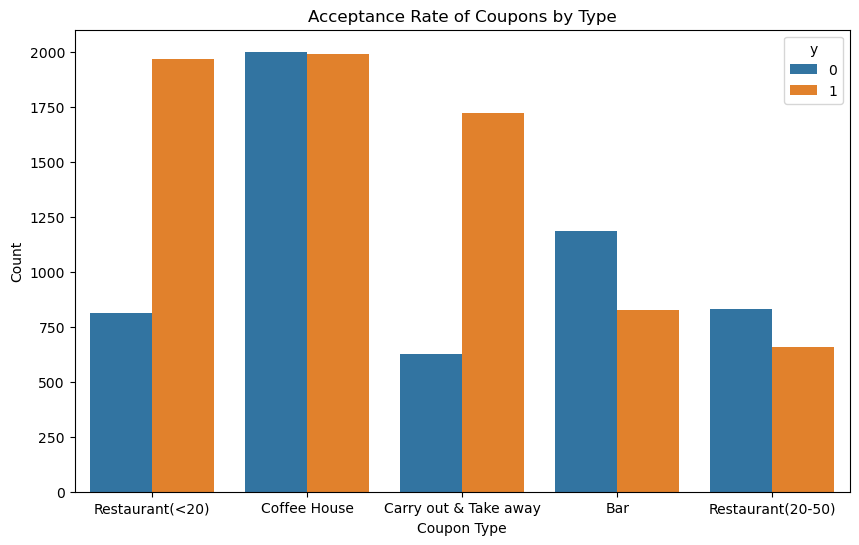

In [18]:
# Creating count plot to visually represent the data.
plt.figure(figsize=(10,6))

# Plotting count plot for 'y' column using seaborn
sns.countplot(data=df, x='coupon', hue='y')

# Adding title to the plot
plt.title('Acceptance Rate of Coupons by Type')
# Adding label to the x-axis
plt.xlabel('Coupon Type')
# Adding label to the y-axis
plt.ylabel('Count')
# Save the plot to a file
plt.savefig("images/acceptance_rate_of_coupons_by_type.png")

# Display the plot
plt.show()

<b>Observations:</b>

  - The greatest number of coupons offered are for Coffee House.
  - Carry out & Take away and Cheap Restaurant coupons have the highest accepted rates. 
  - Bar and Expensive restaurant coupons have low acceptance rates.

6. Use a histogram to visualize the temperature column.

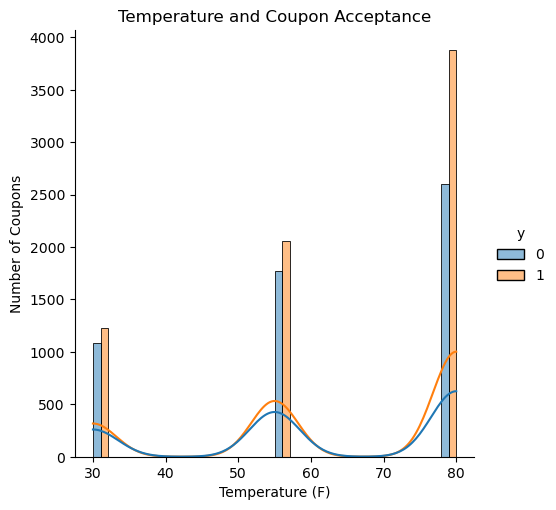

In [19]:
# Plotting histogram of the temperature column using Seaborn
sns.displot(data=df, x='temperature', hue='y', multiple='dodge', kde=True)

# Adding title to the plot
plt.title('Temperature and Coupon Acceptance')
# Adding label to the x-axis
plt.xlabel('Temperature (F)')
# Adding label to the y-axis
plt.ylabel('Number of Coupons')
# Save the plot to a file
plt.savefig("images/temperature_and_coupon_acceptance.png")

# Show the plot
plt.show()

<b>Observations:</b>

   - Most drivers prefer to go out when the temperature is 80 F and have high coupon acceptance rates
   - When the temperature is 30 F, coupon acceptance rate is low.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
# Filter the dataset for 'Bar' coupons
bar_coupons_df = df.query('coupon == "Bar"')

# Print the new DataFrame to display only bar coupons
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,income,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq15min,tocoupon_geq25min,direction_same,y
9,No Urgent Place,Kid(s),Sunny,80,Morning,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
13,Home,Alone,Sunny,55,Evening,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,1
17,Work,Alone,Sunny,55,Morning,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0
24,No Urgent Place,Friend(s),Sunny,80,Morning,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
35,Home,Alone,Sunny,55,Evening,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,1,1


2. What proportion of bar coupons were accepted?


The proportion of bar coupons accepted: 41.00%
The proportion of bar coupons rejected: 59.00%


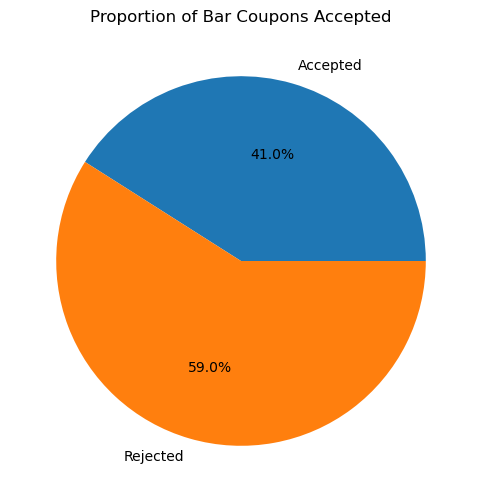

In [21]:
accepted_proportion = bar_coupons_df['y'].mean()
rejected_proportion = 1 - accepted_proportion

print(f"The proportion of bar coupons accepted: {accepted_proportion * 100:.2f}%")
print(f"The proportion of bar coupons rejected: {rejected_proportion * 100:.2f}%")

# Plotting with Pie chart to visually represent above data.
plt.figure(figsize=(10,6))

sizes = [accepted_proportion, rejected_proportion]
labels = ['Accepted','Rejected']

# Plotting pie chart for proportion of bar coupon acceptance using Matplotlib
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# Adding title to the plot
plt.title('Proportion of Bar Coupons Accepted')
# Save the plot to a file
plt.savefig("images/proportion_of_bar_coupons_accepted.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - 41% of the drivers accepted the bar coupons.
   - The drivers rejected the bar coupons are more than the accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for drivers who went to a bar 3 or fewer times: 37.05%
Acceptance rate for all other drivers: 76.88%


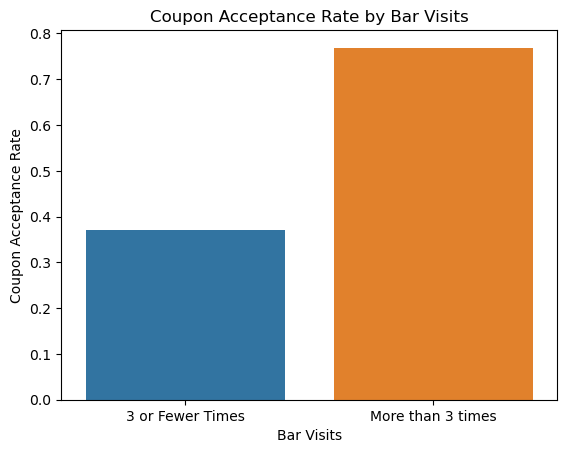

In [22]:
# Filter the DataFrame for individuals who went to a bar 3 or fewer times a month
bar_3_or_fewer_list = ['never', 'less1','1~3']
bar_3_or_fewer_df = bar_coupons_df.query('bar in @bar_3_or_fewer_list')

# Filter the DataFrame for individuals who went more than fewer times a month
# bar_more_than_3_list = ['4~8','gt8']
bar_more_than_3_df = bar_coupons_df.query('not (bar in @bar_3_or_fewer_list)')

acceptance_rate_3_or_fewer = bar_3_or_fewer_df['y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3_df['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who went to a bar 3 or fewer times: {acceptance_rate_3_or_fewer * 100:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_more_than_3 * 100:.2f}%")

# Visually representing the data.
driver_visit_categories = ['3 or Fewer Times', 'More than 3 times']
acceptance_rates = [acceptance_rate_3_or_fewer, acceptance_rate_more_than_3]

# Creating count plot to visually represent the data.
sns.barplot(x=driver_visit_categories, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Bar Visits')
# Adding label to the x-axis
plt.xlabel('Bar Visits')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coupon_acceptance_rate_by_bar_visits.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Drivers who go to bars more often may be more likely to accept the coupons.
   - Drivers who go to bars more often are more likely to be looking for ways to save money.
   - Drivers who go to bars more often are more likely to be loyal to their favorite bars.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to bar more than once a month and are over age of 25: 69.52%
Acceptance rate for all other drivers: 33.46%


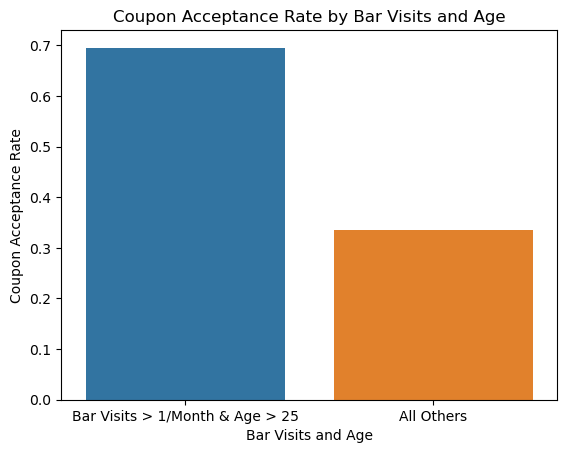

In [23]:
# Filter the DataFrame for drivers who go to bar more than once a month and are over age of 25
bar_more_than_once_list = ['1~3','4~8','gt8']
drivers_age_over_25_list = ['26','31','36','41','46','50plus']
drivers_to_bar_more_than_once_age_over_25 = bar_coupons_df.query('bar in @bar_more_than_once_list and age in @drivers_age_over_25_list')

# Filter the DataFrame for all other drivers
all_others = bar_coupons_df.query('not (bar in @bar_more_than_once_list and age in @drivers_age_over_25_list)')

# Calculate the acceptance rates for each group
acceptance_rate_drivers_to_bar_more_than_once_age_over_25 = drivers_to_bar_more_than_once_age_over_25['y'].mean()
acceptance_rate_all_others = all_others['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bar more than once a month and are over age of 25: {acceptance_rate_drivers_to_bar_more_than_once_age_over_25 * 100:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others * 100:.2f}%")

# Visual representation of the data.
driver_visit_categories = ['Bar Visits > 1/Month & Age > 25', 'All Others']
acceptance_rates = [acceptance_rate_drivers_to_bar_more_than_once_age_over_25, acceptance_rate_all_others]

# Creating count plot to visually represent the data.
sns.barplot(x=driver_visit_categories, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Bar Visits and Age')
# Adding label to the x-axis
plt.xlabel('Bar Visits and Age')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coupon_acceptance_rate_by_bar_visits_and_age.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Drivers who go to a bar more than once a month and are over the age of 25 is twice as high as the acceptance rate for all other drivers.
   - Statistically there is no significant difference in the acceptance rates between the current and previous plots.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate for drivers who go to bar > 1/month, had passangers that were not kids and had occupations 
other than Farming Fishing & Forestry: 71.32%
Acceptance rate for all other drivers: 29.54%


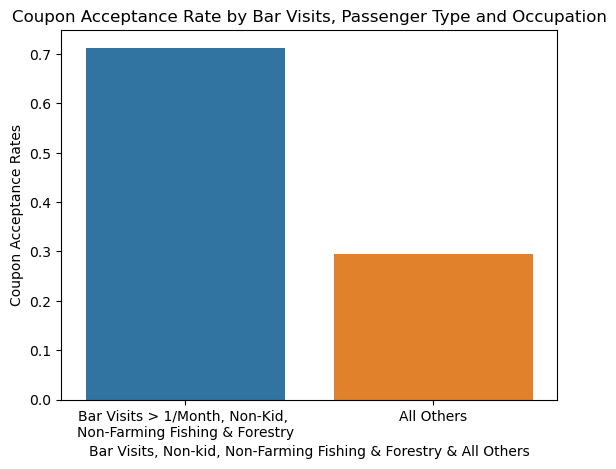

In [24]:
# Filter the DataFrame for drivers who go to bar more than once a month, had passangers that were not kids 
# and had occupations other than Farming Fishing & Forestry
bar_more_than_once_month_list = ['1~3','4~8','gt8']
drivers_to_bar_more_than_once_not_kid_occupation_not_farm = bar_coupons_df.query('bar in @bar_more_than_once_month_list and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')

#bar_all_others_list = ['never','less1']
# Filter the DataFrame for all other drivers
all_others = bar_coupons_df.query('not (bar in @bar_more_than_once_month_list and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry")')

# Calculate the acceptance rates for each group
acceptance_rate_drivers_to_bar_more_than_once_not_kid_occupation_not_farm = drivers_to_bar_more_than_once_not_kid_occupation_not_farm['y'].mean()
acceptance_rate_all_others = all_others['y'].mean()

# Print the acceptance rates
print(f'''Acceptance rate for drivers who go to bar > 1/month, had passangers that were not kids and had occupations 
other than Farming Fishing & Forestry: {acceptance_rate_drivers_to_bar_more_than_once_not_kid_occupation_not_farm * 100:.2f}%''')
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others * 100:.2f}%")

# Visual representation of the data.
driver_visit_categories = ['Bar Visits > 1/Month, Non-Kid, \nNon-Farming Fishing & Forestry', 'All Others']
acceptance_rates = [acceptance_rate_drivers_to_bar_more_than_once_not_kid_occupation_not_farm, acceptance_rate_all_others]

# Creating count plot to visually represent the data.
sns.barplot(x=driver_visit_categories, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Bar Visits, Passenger Type and Occupation')
# Adding label to the x-axis
plt.xlabel('Bar Visits, Non-kid, Non-Farming Fishing & Forestry & All Others')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rates')
# Save the plot to a file
plt.savefig("images/coupon_acceptance_rate_by_bar_visits_passenger_occupation.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Now we can conclude that statistically there is no significant difference in the acceptance rates between all the groups.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who go to bar > 1/month, had passangers that were not kids and were not widowed: 71.32%
Acceptance rate for drivers who go to bar > 1/month and are under the age of 30: 72.17%
Acceptance rate for drivers who go to cheap restaurants > 4/month and income is less than 50K: 45.35%


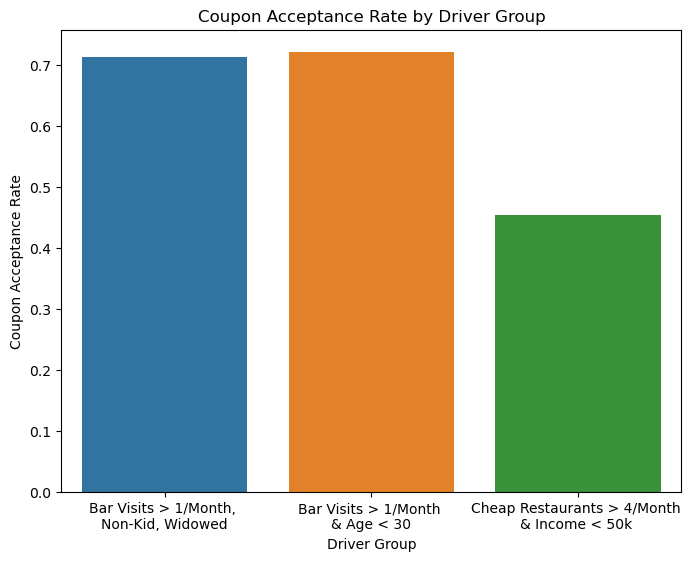

In [25]:
# Filter the DataFrame for drivers who go to bar more than once a month, had passangers that were not kids 
# and were not widowed
bar_more_than_once_month_list = ['1~3','4~8','gt8']
drivers_to_bar_more_than_once_not_kid_not_widowed = bar_coupons_df.query('bar in @bar_more_than_once_month_list and passanger != "Kid(s)" and maritalstatus != "Widowed"')

# Filter the DataFrame for drivers who go to bar more than once a month and are under the age of 30
drivers_age_under_30_list = ['below21','21','26']
drivers_to_bar_more_than_once_under_age_30 = bar_coupons_df.query('bar in @bar_more_than_once_month_list and age in @drivers_age_under_30_list')

#Filter the DataFrame for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurants_more_than_4_list = ['4~8','gt8']
income_less_than_50k = ['Less than $12500', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499']
drivers_to_cheap_restaurants_more_than_4_income_less_than_50k = bar_coupons_df.query('restaurantlessthan20 in @cheap_restaurants_more_than_4_list and income in @income_less_than_50k')

# Calculate the acceptance rates for each group
acceptance_rate_drivers_to_bar_more_than_once_not_kid_not_widowed = drivers_to_bar_more_than_once_not_kid_not_widowed['y'].mean()
acceptance_rate_drivers_to_bar_more_than_once_under_age_30 = drivers_to_bar_more_than_once_under_age_30['y'].mean()
acceptance_rate_drivers_to_cheap_restaurants_more_than_4_income_less_than_50k = drivers_to_cheap_restaurants_more_than_4_income_less_than_50k['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bar > 1/month, had passangers that were not kids and were not widowed: {acceptance_rate_drivers_to_bar_more_than_once_not_kid_not_widowed * 100:.2f}%")
print(f"Acceptance rate for drivers who go to bar > 1/month and are under the age of 30: {acceptance_rate_drivers_to_bar_more_than_once_under_age_30 * 100:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants > 4/month and income is less than 50K: {acceptance_rate_drivers_to_cheap_restaurants_more_than_4_income_less_than_50k * 100:.2f}%")

# Visual representation of the data.
driver_groups = ['Bar Visits > 1/Month, \nNon-Kid, Widowed', 'Bar Visits > 1/Month \n& Age < 30','Cheap Restaurants > 4/Month \n& Income < 50k ']
acceptance_rates = [acceptance_rate_drivers_to_bar_more_than_once_not_kid_not_widowed, acceptance_rate_drivers_to_bar_more_than_once_under_age_30, acceptance_rate_drivers_to_cheap_restaurants_more_than_4_income_less_than_50k]

plt.figure(figsize=(8,6))

# Creating count plot to visually represent the data.
sns.barplot(x=driver_groups, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Driver Group')
# Adding label to the x-axis
plt.xlabel('Driver Group')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coupon_acceptance_rate_by_bar_driver_group.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Drivers who go to bars more than once a month and are under age 30 are more likely accept coupons than other drivers.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

   Based on the observations we have made; we can hypothesize that drivers who accepted bar coupons are more likely    to be:
   - Younger
   - Single
   - Have a higher income
   - Go to bars more often to 
   - Have passengers that are not kids
   - Have occupations other than farming, fishing, or forgery

   Here are some additional thoughts on why these drivers might be more likely to accept bar coupons.

   - Younger drivers may be more likely to go to bars and to be interested in trying new things.
   - Single drivers may be more likely to go to bars and to be more open to receiving coupons.
   - Drivers with higher income may be more likely to go to bars and be able to offord to spend money on drinks.
   - Drivers who have passengers that are not kids may be more likely to be able to use the coupons themselves.
   - Drivers with occupations other than farming, fishing, or forgery may be more likely to be interested in trying new things and to be more open to receiving coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<b>Investigating the Coffee House Coupons</b>

   - Create a new DataFrame that contains just the coffeehouse coupons.


In [26]:
# Filter the dataset for 'Coffee House' coupons
coffee_house_coupons_df =  df.query('coupon == "Coffee House"')

# Calculate Summary statistics
coffee_house_coupons_df.describe()

,temperature,has_children,tocoupon_geq15min,tocoupon_geq25min,direction_same,y
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,68.035849,0.387566,0.518927,0.077714,0.187766,0.498621
std,15.980067,0.487256,0.499704,0.267754,0.390574,0.500061
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of coffee house coupons were accepted?

The proportion of coffee house coupons accepted: 49.86%
The proportion of coffee house coupons rejected: 50.14%


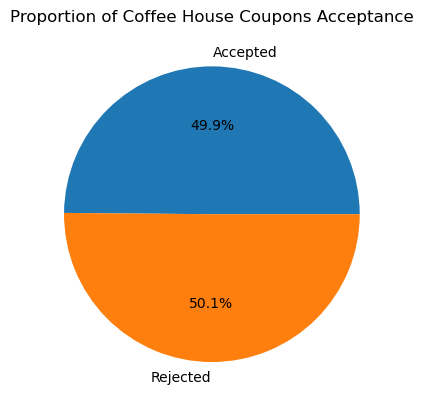

In [27]:
accepted_proportion = coffee_house_coupons_df['y'].mean()
rejected_proportion = 1 - accepted_proportion

print(f"The proportion of coffee house coupons accepted: {accepted_proportion * 100:.2f}%")
print(f"The proportion of coffee house coupons rejected: {rejected_proportion * 100:.2f}%")

# Plotting with Pie chart to visually represent above data.
sizes = [accepted_proportion, rejected_proportion]
labels = ['Accepted','Rejected']

# Plotting pie chart for proportion of coffee house coupon acceptance using Matplotlib
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# Adding title to the plot
plt.title('Proportion of Coffee House Coupons Acceptance')
# Save the plot to a file
plt.savefig("images/proportion_of_coffehouse_coupon_acceptance_rate.png")

# Display the plot
plt.show()

<b>Observations:</b>

   - The number of drivers accept Coffee House coupons are almost same as the drivers rejected
   - The coffee house coupons were not effective in encouraging passengers to purchase coffee at Coffee House.

3. Compare the acceptance rate between male and female passengers who received the coffee house coupons?

Acceptance rate for male drivers who go to a coffee house: 50.59%
Acceptance rate for female drivers who go to a coffee house: 49.17%


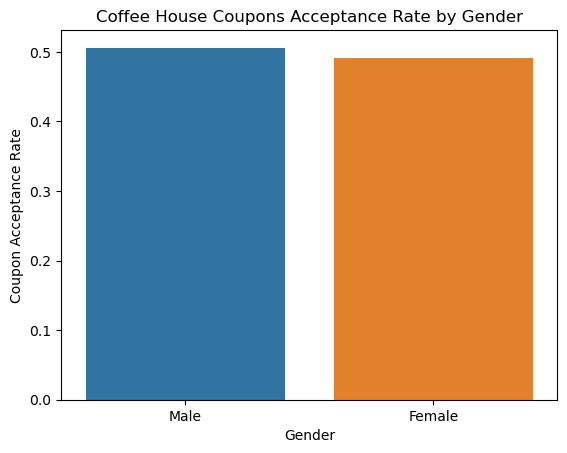

In [28]:
# Filter the DataFrame for individuals who are male
coffeehouse_male_df = coffee_house_coupons_df.query('gender == "Male"')

# Filter the DataFrame for individuals who are female
coffeehouse_female_df = coffee_house_coupons_df.query('gender == "Female"')

# Calculate the acceptance rates for each group
acceptance_rate_male = coffeehouse_male_df['y'].mean()
acceptance_rate_female = coffeehouse_female_df['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for male drivers who go to a coffee house: {acceptance_rate_male * 100:.2f}%")
print(f"Acceptance rate for female drivers who go to a coffee house: {acceptance_rate_female * 100:.2f}%")

# Creating count plot to visually represent the data.
sns.barplot(x=['Male','Female'], y=[acceptance_rate_male, acceptance_rate_female])

# Adding title to the plot
plt.title('Coffee House Coupons Acceptance Rate by Gender')
# Adding label to the x-axis
plt.xlabel('Gender')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coffee_house_coupon_acceptance_rate_by_gender.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - The male drivers accept Coffe House coupons are almost same as the female drivers.

4. Compare the acceptance rate between drivers who go to a coffee house more than once a month are male and over the age 30 to all others. Is there a difference?

Acceptance rate for male drivers who go to a coffee house more than once a month and over age 30: 62.70%
Acceptance rate for all other drivers who go to a coffee house: 48.55%


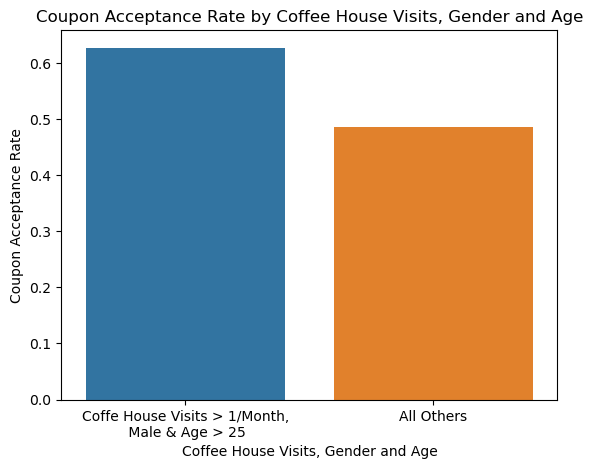

In [29]:
# Filter the DataFrame for drivers who go to coffee house more than once a month are male and are over age of 30
coffee_house_more_than_once_list = ['1~3','4~8','gt8']
drivers_age_over_30_list = ['31','36','41','46','50plus']
drivers_to_coffe_house_more_than_once_male_age_over_30 = coffee_house_coupons_df.query('coffeehouse in @coffee_house_more_than_once_list and gender == "Male" and age in @drivers_age_over_30_list')

# Filter the DataFrame for all other drivers
all_others = coffee_house_coupons_df.query('not (coffeehouse in @coffee_house_more_than_once_list and gender == "Male" and age in @drivers_age_over_30_list)')

# Calculate the acceptance rates for each group
acceptance_rate_drivers_to_coffe_house_more_than_once_male_age_over_30 = drivers_to_coffe_house_more_than_once_male_age_over_30['y'].mean()
acceptance_rate_all_others = all_others['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for male drivers who go to a coffee house more than once a month and over age 30: {acceptance_rate_drivers_to_coffe_house_more_than_once_male_age_over_30 * 100:.2f}%")
print(f"Acceptance rate for all other drivers who go to a coffee house: {acceptance_rate_all_others * 100:.2f}%")

driver_visit_categories = ['Coffe House Visits > 1/Month,\n Male & Age > 25', 'All Others']
acceptance_rates = [acceptance_rate_drivers_to_coffe_house_more_than_once_male_age_over_30, acceptance_rate_all_others]

# Creating bar plot to visually represent the data.
sns.barplot(x=driver_visit_categories, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Coffee House Visits, Gender and Age')
# Adding label to the x-axis
plt.xlabel('Coffee House Visits, Gender and Age')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coffee_house_coupon_acceptance_rate_by_visits_gender_age.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Drivers who go to coffee house more than once a month, male and over the age 30 are more likely to drink coffee than other drivers.
   - All other drivers are more likely to be receptive to coupon acceptance.
   - There is a significant difference in the acceptance rate between these two groups of drivers.

5. Compare the acceptance rate between drivers who go to a coffee house more than once a month on a rainy day in the morning to others.

Acceptance rate for drivers who go to coffee house more than once a month on a rainy day in the morning: 75.00%
Acceptance rate for all other drivers: 49.61%


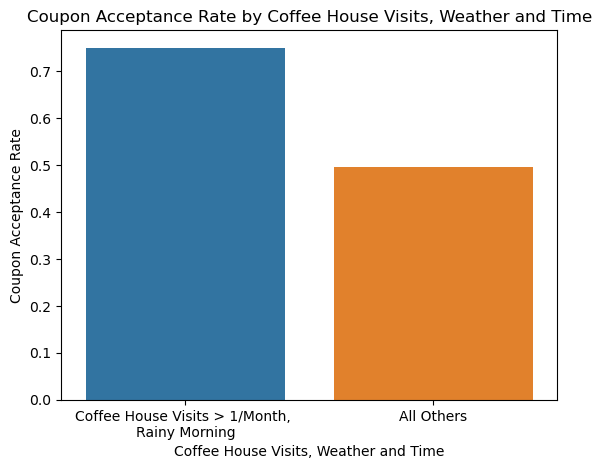

In [30]:
# Filter the DataFrame for drivers who go to coffee house more than once a month on a rainy day in the morning.
coffee_house_more_than_once_list = ['1~3','4~8','gt8']
drivers_to_coffee_house_more_than_once_rainy_day_morning = coffee_house_coupons_df.query('coffeehouse in @coffee_house_more_than_once_list and weather == "Rainy" and time == "Morning"')

# Filter the DataFrame for all other drivers
all_others = coffee_house_coupons_df.query('not (coffeehouse in @coffee_house_more_than_once_list and weather == "Rainy" and time == "Morning")')

# Calculate the acceptance rates for each group
acceptance_rate_drivers_to_coffee_house_more_than_once_rainy_day_morning = drivers_to_coffee_house_more_than_once_rainy_day_morning['y'].mean()
acceptance_rate_all_others = all_others['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to coffee house more than once a month on a rainy day in the morning: {acceptance_rate_drivers_to_coffee_house_more_than_once_rainy_day_morning * 100:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others * 100:.2f}%")

driver_visit_categories = ['Coffee House Visits > 1/Month, \nRainy Morning', 'All Others']
acceptance_rates = [acceptance_rate_drivers_to_coffee_house_more_than_once_rainy_day_morning, acceptance_rate_all_others]

# Creating count plot to visually represent the data.
sns.barplot(x=driver_visit_categories, y=acceptance_rates)

# Adding title to the plot
plt.title('Coupon Acceptance Rate by Coffee House Visits, Weather and Time')
# Adding label to the x-axis
plt.xlabel('Coffee House Visits, Weather and Time')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coffee_house_coupon_acceptance_rate_by_visits_weather_time.png")

# Display the plot
plt.show()

6. Compare the acceptance rates between those drivers who:
   - go to coffee house more than once a month, on rainy day, and going to home OR
   - go to coffee house more than once a month and are going out when temperature greater than 50F  OR
   - go to coffee house with friends and have bachelor's degree and income is greater than 25K.

Acceptance rate for drivers who go to coffee house > 1/month, rainy day, and going to home : 51.67%
Acceptance rate for drivers who go to coffee house > 1/month and are going out when temperature > 50F: 66.97%
Acceptance rate for drivers who go to coffee house with friends and have bachelor's degree and income > 25K: 53.02%


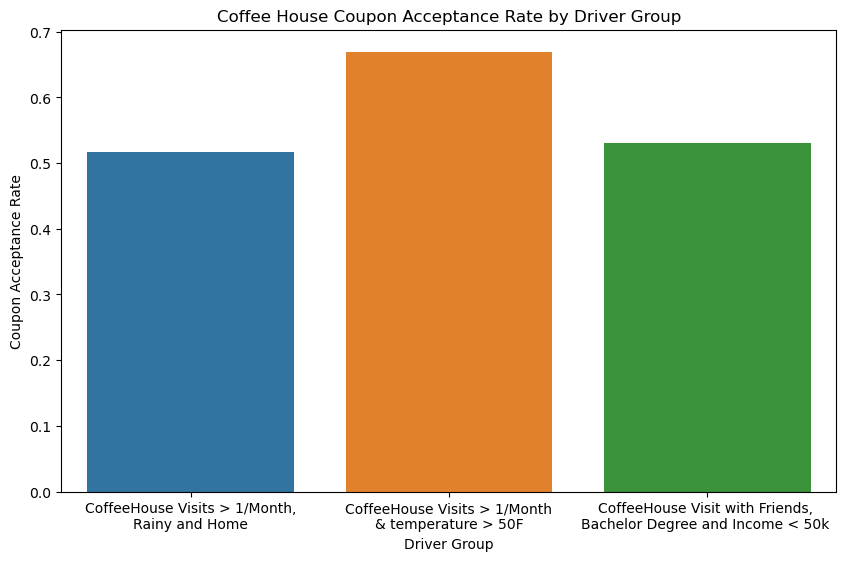

In [31]:
# Filter the DataFrame for drivers who go to coffee house more than once a month, on rainy day and going to home.
coffee_house_more_than_once_month_list = ['1~3','4~8','gt8']
drivers_to_coffe_house_more_than_once_rainy_going_home = coffee_house_coupons_df.query('coffeehouse in @coffee_house_more_than_once_month_list and weather == "Rainy" and destination == "Home"')

# Filter the DataFrame for drivers who go to coffee house more than once a month and are going out when temperature > 50F
temperature_greater_than_50_list = [55, 80]
drivers_to_coffee_house_more_than_once_temparature_greater_than_50F = coffee_house_coupons_df.query('coffeehouse in @coffee_house_more_than_once_month_list and temperature in @temperature_greater_than_50_list')

#Filter the DataFrame for drivers who go to coffee house with friends and have bachelor's degree and income > 25K
income_greater_than_25k_list = ['$37500 - $49999','$62500 - $74999','$75000 - $87499','$50000 - $62499','$25000 - $37499','$100000 or More','$87500 - $99999']
drivers_to_coffee_house_with_friends__bachelor_degree_income_greater_than_25k = coffee_house_coupons_df.query('passanger == "Friend(s)" and education == "Bachelors degree" and income in @income_greater_than_25k_list')

# Calculate the accerptance rates for each group
acceptance_rate_drivers_to_coffe_house_more_than_once_rainy_going_home = drivers_to_coffe_house_more_than_once_rainy_going_home['y'].mean()
acceptance_rate_drivers_to_coffee_house_more_than_once_temparature_greater_than_50F = drivers_to_coffee_house_more_than_once_temparature_greater_than_50F['y'].mean()
acceptance_rate_drivers_to_coffee_house_with_friends_bachelor_degree_income_greater_than_25k = drivers_to_coffee_house_with_friends__bachelor_degree_income_greater_than_25k['y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to coffee house > 1/month, rainy day, and going to home : {acceptance_rate_drivers_to_coffe_house_more_than_once_rainy_going_home * 100:.2f}%")
print(f"Acceptance rate for drivers who go to coffee house > 1/month and are going out when temperature > 50F: {acceptance_rate_drivers_to_coffee_house_more_than_once_temparature_greater_than_50F * 100:.2f}%")
print(f"Acceptance rate for drivers who go to coffee house with friends and have bachelor's degree and income > 25K: {acceptance_rate_drivers_to_coffee_house_with_friends_bachelor_degree_income_greater_than_25k * 100:.2f}%")

# Visual representation of the data.
driver_groups = ['CoffeeHouse Visits > 1/Month,\nRainy and Home', 'CoffeeHouse Visits > 1/Month\n& temperature > 50F','CoffeeHouse Visit with Friends, \nBachelor Degree and Income < 50k ']
acceptance_rates = [acceptance_rate_drivers_to_coffe_house_more_than_once_rainy_going_home, acceptance_rate_drivers_to_coffee_house_more_than_once_temparature_greater_than_50F, acceptance_rate_drivers_to_coffee_house_with_friends_bachelor_degree_income_greater_than_25k]

# Creating count plot to visually represent the data.
plt.figure(figsize=(10,6))
sns.barplot(x=driver_groups, y=acceptance_rates)

# Adding title to the plot
plt.title('Coffee House Coupon Acceptance Rate by Driver Group')
# Adding label to the x-axis
plt.xlabel('Driver Group')
# Adding label to the y-axis
plt.ylabel('Coupon Acceptance Rate')
# Save the plot to a file
plt.savefig("images/coffee_house_coupon_acceptance_rate_by_gender.png")

# Display the plot
plt.show()

<b>Observations:</b>
   - Rainy weather may have a slight influence on the acceptance rate as drivers are receptive to new coffee houses.
   - When the weather is warm, and drivers are more likely to accept the coupons and try new coffee houses.
   - Drivers with higher incomes and education levels are more likely to accept coupons and try new coffee houses.

7. Based on these observations, what do you hypothesize about drivers who accepted the coffee house coupons?

   Based on the observations we have made; we can hypothesize that drivers who accepted coffee house coupons are more likely to be:
   - Male
   - Go to coffee house more often
   - Go to coffee house on rainy days
   - Go to coffee house with friends
   - Have higher education level and higher income
   
   Here are some additional thoughts on why these drivers might be more likely to accept coffee house coupons.

   - Male drivers are more likely to drink coffee than female drivers or it could be they are more receptive to marketing messages.
   - Drivers who go to coffee house more than once a month are more likely to be interested in receiving the coupons and to be in the market for a new coffee house to try.
   - Drivers who go to coffee house on rainy days are more likely to be looking for a place to warm up and get a cup of coffee.
   - Drivers with friends are more likely to trust the recommendations of their friends or willing to try new coffee houses
   - Drivers with higher degree and higher income are more likely to be aware of new coffee houses and willing to try them or they have disposable income to spend on coffee. 

